In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv') #load train csv

In [3]:
df.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.columns #feature yang digunakan untuk mencari rentang harga

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col, ' ', df[col].unique()) #mengetahui nilai unik dari masing-masing feature
    #dari sini dapat diketahui bahwa masing-masing feature tidak memiliki nilai aneh atau sesuatu yang terindikasi null atau null itu sendiri

battery_power   [ 842 1021  563 ... 1139 1467  858]
blue   [0 1]
clock_speed   [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim   [0 1]
fc   [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g   [0 1]
int_memory   [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep   [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt   [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 

In [6]:
#Business Understanding
#arti dari masing-masing feature dalam domain knowledge mobile pricing
#battery_power : total energy a battery can store in one time measured in mAh
#blue : has bluetooth or not, 0 is none, 1 is has
#clock_speed : speed at which microprossor executes instructions
#dual_sim : has dual sim support or not, 0 is hasnt, 1 is has
#fc : front camera mega pixels
#int_memory : internal memory in Gigabytes
#m_dep : mobile depth in cm
#n_cores : number of cores of processor
#pc : primary camera mega pixels
#px_height : pixel resolution height
#px_width : pixel resolution width
#ram : random access memory in megabytes
#sc_h : screen height of mobile in cm
#sc_w : screen width of mobile in cm
#talk_time : longest time that a single battery charge will last when you are
#three_g : has 3G or not, 0 is hasnt, 1 is has
#touch_screen : has touch screen or not, 0 is hasnt, 1 is has
#wifi : has wifi or not, 0 is hasnt, 1 is has
#price_range : target value with value of 0 (low cost), 1 (medium cost), 2 (high cost), 3 (very high cost)

In [7]:
df['talk_time'].describe() #mengetahui lebih detail mengenai nilai yang terdapat dalam masing-masing feature untuk mengetahui outlier

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

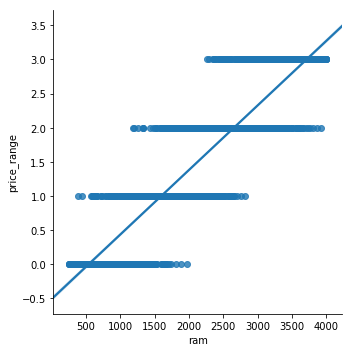

In [8]:
sns.lmplot(x = 'ram', y='price_range', data = df)

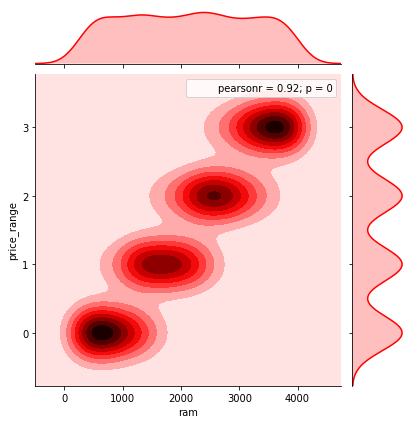

In [9]:
sns.jointplot(x = 'ram', y='price_range', data = df, color = 'red', kind = 'kde')

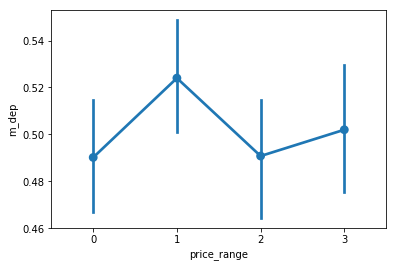

In [10]:
sns.pointplot(y = 'm_dep', x = 'price_range', data= df)

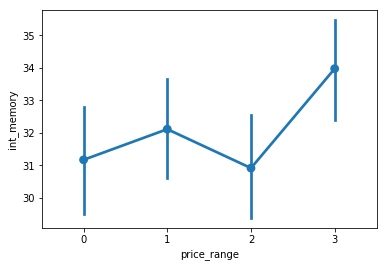

In [11]:
sns.pointplot(df['price_range'], df['int_memory'])

In [12]:
labels = ['3G-supported', 'Not supported']
values = df['three_g'].value_counts().values

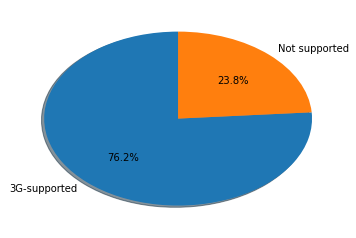

In [13]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
labels4g = ['4G-supported', 'Not supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels = labels4g, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.show()

In [ ]:
sns.boxplot(x = 'price_range', y='battery_power', data = df)

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha = 0.5, color ='blue', label = 'Front camera')
df['pc'].hist(alpha = 0.5, color = 'red', label = 'Primary camera')
plt.legend(loc ='upper right')
plt.xlabel('MegaPixels')

In [ ]:
sns.jointplot(df['mobile_wt'], df['price_range'], kind='kde')

In [ ]:
sns.pointplot(df['price_range'], df['talk_time'])

In [ ]:
X = df.drop('price_range', axis = 1)

In [ ]:
y = df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm.score(X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

In [ ]:
import pickle
pickle.dump(knn,open("model.pkl","wb"))

In [ ]:
knn.score(X_test, y_test)

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor='red', markersize =5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
logmodel.score(X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
dtree.score(X_test, y_test)

In [ ]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
plt.plot(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot = True)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

In [ ]:
df_test.drop('id', axis = 1, inplace = True)

In [ ]:
df_test.head()

In [ ]:
predicted_price = knn.predict(df_test)

In [ ]:
predicted_price

In [ ]:
df_test['price_range'] = predicted_price

In [ ]:
df_test.head()